[['Freeze', 'Wind', 'Flood', 'Quake', 'Hail'], ['5 years', 66386, 174296, 75131, 577908, 32015], ['10 years', 58230, 381139, 78045, 99308, 160454], ['20 years', 89135, 80552, 152558, 497981, 603535], ['30 years', 78415, 81858, 150656, 193263, 69638], ['40 years', 139361, 331509, 343164, 781380, 52269]]


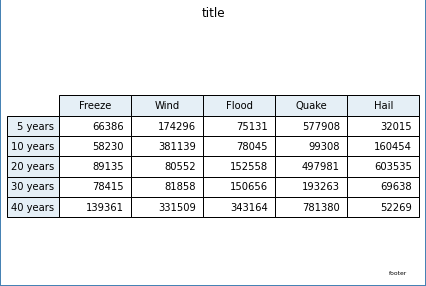

In [2]:
import numpy as np
from source.utils import plotMatResult

data_columns = ['Freeze', 'Wind', 'Flood', 'Quake', 'Hail']

data_rows = ['5 years', '10 years', '20 years', '30 years', '40 years']

# data =  np.array([
#     [   66386, 174296,   75131,  577908,  32015],
#     [  58230, 381139,   78045,   99308, 160454],
#     [  89135,  80552,  152558,  497981, 603535],
#     [  78415,  81858,  150656,  193263,  69638],
#     [ 139361, 331509,  343164,  781380,  52269],
# ])
data =  [
    [   66386, 174296,   75131,  577908,  32015],
    [  58230, 381139,   78045,   99308, 160454],
    [  89135,  80552,  152558,  497981, 603535],
    [  78415,  81858,  150656,  193263,  69638],
    [ 139361, 331509,  343164,  781380,  52269],
]

# title_text, footer_text, row_names, col_names, mat_data, file_name = 'temp.png', save_fig = False, plot_fig=True
plotMatResult('title', 'footer', data_rows, data_columns, data, plot_fig=True)
# import numpy as np
# import matplotlib.pyplot as plt

# title_text = 'Loss by Disaster'
# footer_text = 'June 24, 2020'
# fig_background_color = 'white'
# fig_border = 'steelblue'
# # data =  [
# #             [         'Freeze', 'Wind', 'Flood', 'Quake', 'Hail'],
# #             [ '5 year',  66386, 174296,   75131,  577908,  32015],
# #             ['10 year',  58230, 381139,   78045,   99308, 160454],
# #             ['20 year',  89135,  80552,  152558,  497981, 603535],
# #             ['30 year',  78415,  81858,  150656,  193263,  69638],
# #             ['40 year', 139361, 331509,  343164,  781380,  52269],
# #         ]
# data =  [
#             [         'Freeze', 'Wind', 'Flood', 'Quake', 'Hail'],
#             [ '5 year',  '66386', '174296',   '75131',  '577908',  '32015'],
#             ['10 year',  '58230', '381139',   '78045',   '99308', '160454'],
#             # ['20 year',  89135,  80552,  152558,  497981, 603535],
#             # ['30 year',  78415,  81858,  150656,  193263,  69638],
#             # ['40 year', 139361, 331509,  343164,  781380,  52269],
#         ]


# # Pop the headers from the data array
# column_headers = data.pop(0)
# row_headers = [x.pop(0) for x in data]# Table data needs to be non-numeric text. Format the data
# # while I'm at it.
# cell_text = []
# for row in data:
#     # cell_text.append([f'{x/1000:1.1f}' for x in row])# Get some lists of color specs for row and column headers
#     cell_text.append([x for x in row])# Get some lists of color specs for row and column headers
# rcolors = plt.cm.BuPu(np.full(len(row_headers), 0.1))
# ccolors = plt.cm.BuPu(np.full(len(column_headers), 0.1))# Create the figure. Setting a small pad on tight_layout
# # seems to better regulate white space. Sometimes experimenting
# # with an explicit figsize here can produce better outcome.
# plt.figure(linewidth=2,
#            edgecolor=fig_border,
#            facecolor=fig_background_color,
#            tight_layout={'pad':1},
#            #figsize=(5,3)
#           )# Add a table at the bottom of the axes
# the_table = plt.table(cellText=cell_text,
#                       rowLabels=row_headers,
#                       rowColours=rcolors,
#                       rowLoc='right',
#                       colColours=ccolors,
#                       colLabels=column_headers,
#                       loc='center')# Scaling is the only influence we have over top and bottom cell padding.
# # Make the rows taller (i.e., make cell y scale larger).
# the_table.scale(1, 1.5)# Hide axes
# ax = plt.gca()
# ax.get_xaxis().set_visible(False)
# ax.get_yaxis().set_visible(False)# Hide axes border
# plt.box(on=None)# Add title
# plt.suptitle(title_text)# Add footer
# plt.figtext(0.95, 0.05, footer_text, horizontalalignment='right', size=6, weight='light')# Force the figure to update, so backends center objects correctly within the figure.
# # Without plt.draw() here, the title will center on the axes and not the figure.
# plt.draw()# Create image. plt.savefig ignores figure edge and face colors, so map them.
# fig = plt.gcf()
# plt.show()
# # plt.savefig('pyplot-table-demo.png',
# #             #bbox='tight',
# #             edgecolor=fig.get_edgecolor(),
# #             facecolor=fig.get_facecolor(),
# #             dpi=150
# #             )

In [1]:
%load_ext autoreload
%autoreload 2

from source.read_HAR_dataset import read_har_dataset, har_dimensions, har_activities, har_activities_map, har_ind_IDS
from source.utils import  filter_dimensions
from source.tserie import TSerie
from source.utils import classify_dataset
from itertools import chain, combinations
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from source.utils import idsStd
from sklearn import metrics
from sklearn import svm
import numpy as np
import umap
import sys

sys.path.insert(0, '/home/texs/Documentos/Repositories/mts_viz')
from server.source.storage import MTSStorage


/home/texs/anaconda3/envs/contrastive/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
k = 0
N_TESTS = 2
Z_SCORE_NORM = False


all_ids = har_ind_IDS
test_ids = all_ids[k: k + N_TESTS]
train_ids = all_ids[:k] + all_ids[k + N_TESTS:]        

data = read_har_dataset('./datasets/HAR-UML20/', train_ids=train_ids, test_ids=test_ids, val_ids=[])
ids_train, X_train, y_train, I_train, train_kcal_MET = data['train']
# ids_val, X_val, y_val, I_val, val_kcal_MET = data['val']
ids_test, X_test, y_test, I_test, test_kcal_MET = data['test']

all_dimensions = har_dimensions
activities_map = har_activities_map
train_ind = train_ids
test_ind = test_ids

Train IDS: [2, 3, 4, 5, 6, 7, 8, 9]
Test IDS: [0, 1]
Val IDS: []
Loading dataset from cache...


In [3]:
# y_train[y_train==0] = 0
# y_train[y_train==1] = 0
# y_train[y_train==2] = 0
# y_test[y_test==0] = 0
# y_test[y_test==1] = 0
# y_test[y_test==2] = 0

# for i in range(3, len(har_activities)):
#     y_train[y_train==i] = i - 2
#     y_test[y_test==i] = i - 2

In [4]:
# from imblearn.under_sampling import RandomUnderSampler

# rus = RandomUnderSampler(sampling_strategy='not minority', random_state=1)
# N, T, D = X_train.shape
# # print(X_train.shape)
# X_temp = X_train.reshape([N, T * D])
# # print(X_temp.shape)
# # print(y_train.shape)
# X_temp, y_train = rus.fit_resample(X_temp, y_train)
# X_train = X_temp.reshape([X_temp.shape[0], T, D])

In [5]:
unique, counts = np.unique(y_train, return_counts=True)
print(unique)
print(counts)


[0 1 2 3 4 5 6]
[900 900 900 900 900 900 900]


In [6]:
# # ind_std_train = idsStd(train_ids , X_train, I_train)
# # ind_std_test = idsStd(test_ids, X_test, I_test)


# if Z_SCORE_NORM:
#     N_tr, T, D = X_train.shape
#     N_te, T, D = X_test.shape
#     X_train_sh = np.zeros(X_train.shape)
#     X_test_sh = np.zeros(X_test.shape)
#     for i in range(N_tr):
        
#         for k in range(D):
#             mag = np.mean(X_train[i, :, k], axis = 0)
#             # indice = np.where(train_ind ==  I_train[i])[0][0]
#             # std = ind_std_train[indice][k] * 6
#             # X_train_sh[i, :, k] = (X_train[i, :, k] - mag) / std
#             X_train_sh[i, :, k] = (X_train[i, :, k] - mag)
#             # X_train_sh[i, :, k] = np.concatenate([[0], fft(X_train[i, :, k])[1:]])

#     for i in range(N_te):
#         for k in range(D):
#             mag = np.mean(X_test[i, :, k], axis = 0)
#             # indice = np.where(test_ind ==  I_test[i])[0][0]
#             # std = ind_std_test[indice][k] * 6
#             # X_test_sh[i, :, k] = (X_test[i, :, k] - mag) / std
#             X_test_sh[i, :, k] = (X_test[i, :, k] - mag)
#             # X_test_sh[i, :, k] = fft(X_test[i, :, k])[0:]
# else:
#     X_train_sh = np.copy(X_train)
#     X_test_sh = np.copy(X_test)

# X_train = X_train_sh
# X_test = X_test_sh

mts_train = TSerie(X = X_train, y = y_train, I = I_train)
mts_test = TSerie(X = X_test, y = y_test, I = I_test)
minl, maxl = mts_train.minMaxNormalization()

Loaded mts - N: 6300, T: 200, D: 9 
Loaded mts - N: 2100, T: 200, D: 9 


# PLOTS

In [7]:
X_train.shape
window = mts_train.X[130, :, 3]
print(mts_train.y[130])

[4]


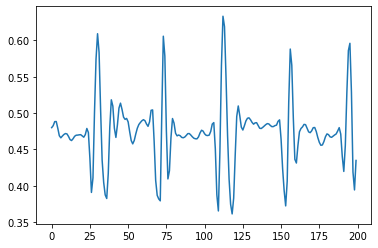

In [8]:
from source.augmentation import  * 
import matplotlib.pyplot as plt


plt.plot(window)

(1, 200, 3)
(1, 200, 3)


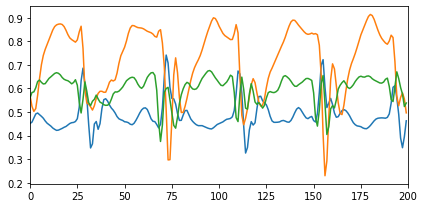

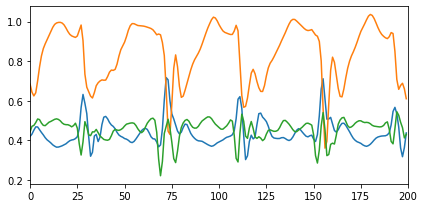

In [25]:
from source.augmentation import  * 
from source.utils import plot1d

# window = mts_train.X[130, :, 3]
window_arr = np.array([mts_train.X[130, :, 0], mts_train.X[130, :, 1], mts_train.X[130, :, 2]])
window_arr = np.expand_dims(window_arr, axis=0)
window_arr = np.transpose(window_arr, [0, 2, 1])
print(window_arr.shape)

# window_rot = flipping(window_arr)
window_rot = rotation(window_arr, angle_range=[-np.pi/8, np.pi/8])

print(window_rot.shape)
plot1d(window_arr[0, :, 0], window_arr[0, :, 1], window_arr[0, :, 2], ylim=[window.min(), window.max()])
plot1d(window_rot[0, :, 0], window_rot[0, :, 1], window_rot[0, :, 2], ylim=[window.min(), window.max()])



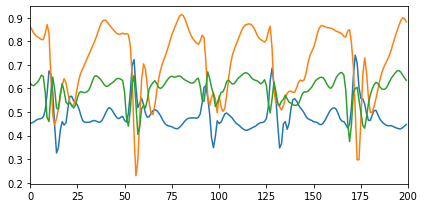

In [51]:
from source.augmentation import  * 
from source.utils import plot1d

window_perm = permutation(window_arr)

# plot1d(window_arr[0, :, 0], window_arr[0, :, 1], window_arr[0, :, 2], ylim=[window.min(), window.max()])
plot1d(window_perm[0, :, 0], window_perm[0, :, 1], window_perm[0, :, 2], ylim=[window.min(), window.max()])



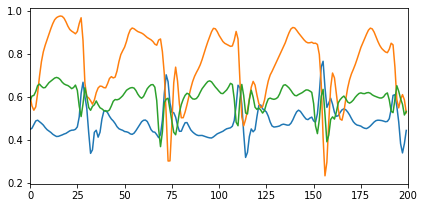

In [81]:
window_magw = magnitude_warp(window_arr, sigma=0.04, knot=4)

# plot1d(window_arr[0, :, 0], window_arr[0, :, 1], window_arr[0, :, 2], ylim=[window.min(), window.max()])
plot1d(window_magw[0, :, 0], window_magw[0, :, 1], window_magw[0, :, 2], ylim=[window.min(), window.max()])

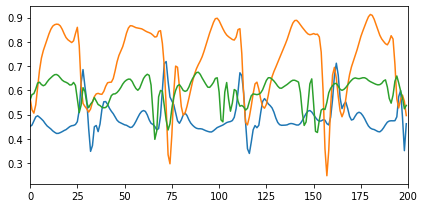

In [119]:
from source.augmentation import  * 
window_timw = time_warp(window_arr, sigma=0.03)

# plot1d(window_arr[0, :, 0], window_arr[0, :, 1], window_arr[0, :, 2], ylim=[window.min(), window.max()])
plot1d(window_timw[0, :, 0], window_timw[0, :, 1], window_timw[0, :, 2], ylim=[window.min(), window.max()])

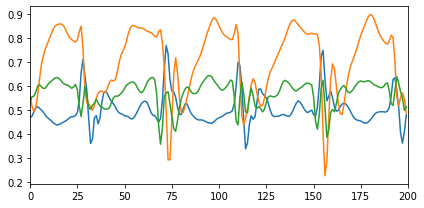

In [161]:
window_scal = scaling(window_arr, sigma=0.05)

# plot1d(window_arr[0, :, 0], window_arr[0, :, 1], window_arr[0, :, 2], ylim=[window.min(), window.max()])
plot1d(window_scal[0, :, 0], window_scal[0, :, 1], window_scal[0, :, 2], ylim=[window.min(), window.max()])

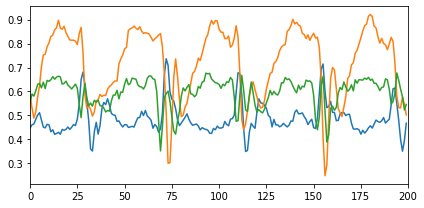

In [171]:
window_jit = jitter(window_arr, sigma=0.01)

# plot1d(window_arr[0, :, 0], window_arr[0, :, 1], window_arr[0, :, 2], ylim=[window.min(), window.max()])
plot1d(window_jit[0, :, 0], window_jit[0, :, 1], window_jit[0, :, 2], ylim=[window.min(), window.max()])

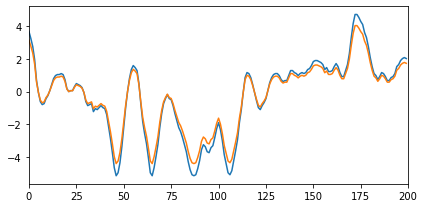

In [15]:
window_rot = scaling(window_arr, sigma=0.3)

plot1d(window, window_rot[0, :, 0])

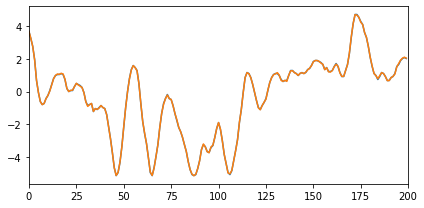

In [16]:
window_rot = jitter(window_arr, sigma=0.02)

plot1d(window, window_rot[0, :, 0])

# EXPERIMENTS

In [4]:
repeat = 4
def augmentData(X, repeat = 3):
    X_out = []
    for i in range(repeat):
        augmented = rotation(X)
        # augmented = permutation(X)
        # augmented = time_warp(X, sigma=0.08)
        # augmented = magnitude_warp(X, sigma=0.4, knot=4)
        # augmented = scaling(X, sigma=0.3)
        # augmented = jitter(X, sigma=0.02)
        if len(X_out) == 0:
            X_out = augmented
        else:
            X_out = np.concatenate((X_out, augmented), axis=0)
    return X_out

X_train_aug = X_train
y_train_aug = y_train

# X_train_aug = augmentData(X_train, repeat)
# X_train_aug = np.concatenate((X_train_aug, X_train), axis=0)
# y_train_aug = y_train
# for i in range(repeat):
#     y_train_aug = np.concatenate((y_train_aug, y_train), axis=0)

In [5]:
dimensions = ['Accelerometer-X', 'Accelerometer-Y', 'Accelerometer-Z', 'Gyrometer-X', 'Gyrometer-Y', 'Gyrometer-Z']

X_train_f = filter_dimensions(X_train_aug, har_dimensions, dimensions)
X_test_f = filter_dimensions(X_test, har_dimensions, dimensions)

In [15]:
from source.tserie import TSerie

mts_train = TSerie(X = X_train_f, y = y_train_aug, I = I_train, dimensions = har_dimensions, classLabels=har_activities_map)
mts_test = TSerie(X = X_test_f, y = y_test, I = I_test, dimensions = har_dimensions, classLabels=har_activities_map)




# mts_train.folding_features_v2()
# mts_test.folding_features_v2()

Loaded mts - N: 6300, T: 200, D: 6 
Loaded mts - N: 2100, T: 200, D: 6 


/home/texs/Documentos/Repositories/mts_feature_learning/source/tserie.py:61: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string " " (-> linestyle=' '). The keyword argument will take precedence.
  axes[0].errorbar(xs, means, stds, linestyle='None', marker='o', elinewidth=3, markersize =4, fmt=' ', ecolor =colors,c='black')


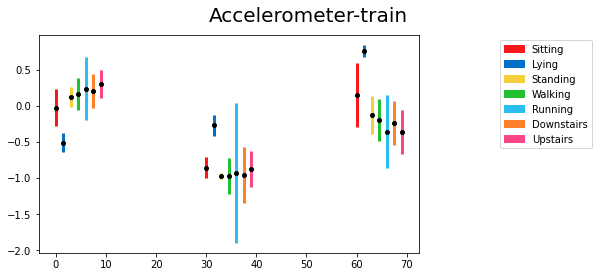

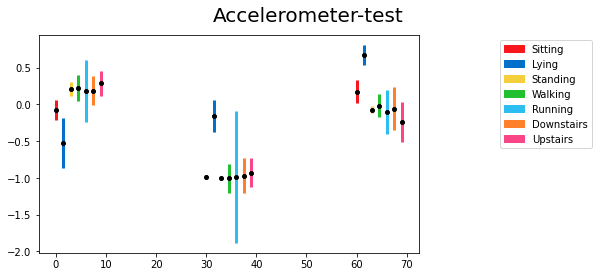

In [16]:
mts_train.reviewByClass(dims=[0, 1, 2], title='Accelerometer-train')
mts_test.reviewByClass(dims=[0, 1, 2], title='Accelerometer-test')

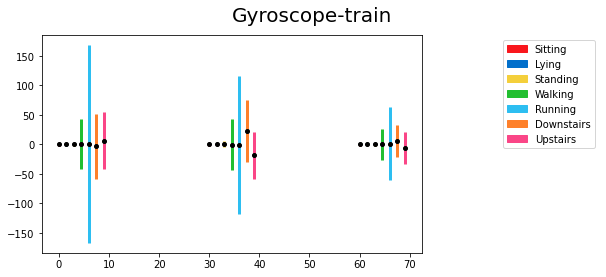

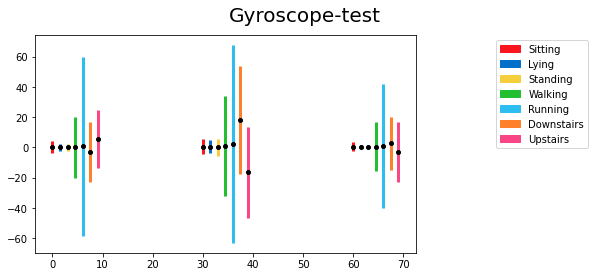

In [20]:
mts_train.reviewByClass(dims=[3, 4, 5], title='Gyroscope-train')
mts_test.reviewByClass(dims=[3, 4, 5], title='Gyroscope-test')

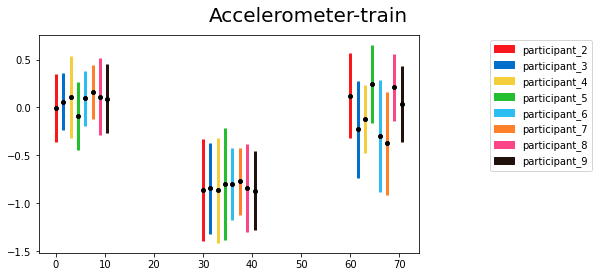

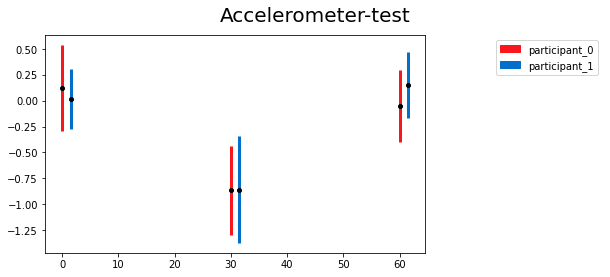

In [22]:
mts_train.reviewByUser(dims=[0, 1, 2], title='Accelerometer-train')
mts_test.reviewByUser(dims=[0, 1, 2], title='Accelerometer-test')

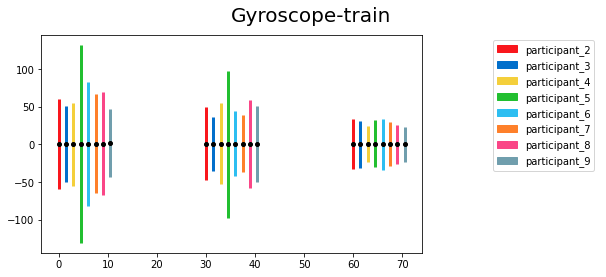

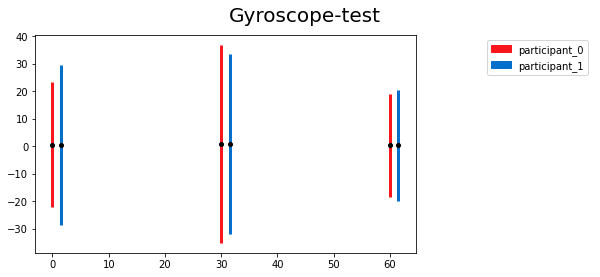

In [23]:
mts_train.reviewByUser(dims=[3, 4, 5], title='Gyroscope-train')
mts_test.reviewByUser(dims=[3, 4, 5], title='Gyroscope-test')

In [20]:
mts_train.y.shape
mts_train.features.shape

(4500, 1200)

In [21]:
import umap

reducer = umap.UMAP(n_components=32, metric='braycurtis')
embeddings_train = reducer.fit_transform(mts_train.features, y= mts_train.y)
embeddings_test = reducer.transform(mts_test.features)

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [22]:
from source.utils import classify_dataset


pred_train, pred_test = classify_dataset(embeddings_train, mts_train.y, embeddings_test, y_test)



Balanced accuracy train:  1.0
Balanced accuracy test:  0.8366666666666667
F1 score train:  1.0
F1 score test:  0.8735699095359345


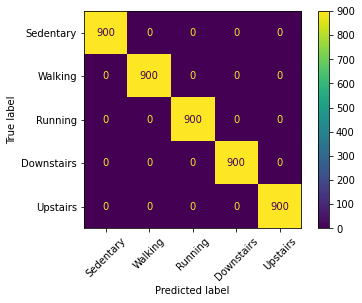

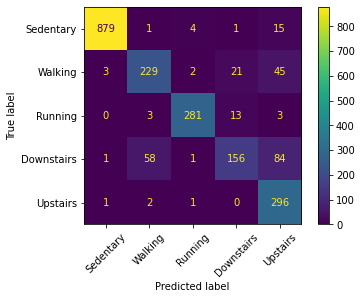

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

bal_accuracy_tr = metrics.balanced_accuracy_score(mts_train.y, pred_train)
bal_accuracy_te = metrics.balanced_accuracy_score(mts_test.y, pred_test)
f1_tr = metrics.f1_score(mts_train.y, pred_train, average='weighted')
f1_te = metrics.f1_score(mts_test.y, pred_test, average='weighted')

print('Balanced accuracy train: ', bal_accuracy_tr)
print('Balanced accuracy test: ', bal_accuracy_te)
print('F1 score train: ', f1_tr)
print('F1 score test: ', f1_te)

filtered_activities = ['Sedentary', 'Walking', 'Running', 'Downstairs','Upstairs']

ConfusionMatrixDisplay.from_predictions (y_train_aug, pred_train, display_labels= filtered_activities, xticks_rotation=45)
ConfusionMatrixDisplay.from_predictions(y_test, pred_test, display_labels= filtered_activities, xticks_rotation=45)
